In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

C:\Users\psath\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Major steps invloved in EDA
1. Check for Duplicates

2. Handle missing values

3. Handle outliers

4. Descriptive Statistics

5. Data Visualization

6. Feature Scaling: Standardization & Normalization

7. Binning & Encoding

In [2]:
df1 = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Insurance)\insurance.csv", skipinitialspace = True)

In [3]:
df1.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Duplicates

In [5]:
df1.duplicated()
df1.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [6]:
# Dataframe indexing
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df1.iloc[550:600]

,age,sex,bmi,children,smoker,region,charges
550,63,male,30.800,0,no,southwest,13390.55900
551,32,female,28.930,0,no,southeast,3972.92470
552,62,male,21.400,0,no,southwest,12957.11800
553,52,female,31.730,2,no,northwest,11187.65670
554,25,female,41.325,0,no,northeast,17878.90068
555,28,male,23.800,2,no,southwest,3847.67400
556,46,male,33.440,1,no,northeast,8334.58960
557,34,male,34.210,0,no,southeast,3935.17990
558,35,female,34.105,3,yes,northwest,39983.42595
559,19,male,35.530,0,no,northwest,1646.42970


In [8]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [9]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df1.shape

(1337, 7)

### Identifying Null Values

In [11]:
df1.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
df1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**There are no null values**

### Identify Corrupted Data 

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**No corrupted data so no need of converting convert currupted data into missing values**

**No missing values so no need of dropping rows**

### Outliers

In [14]:
df1.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

In [15]:
import scipy.stats as stats
zscore_array = stats.zscore(df1.bmi)
np.where(zscore_array>2,1,0).sum()
np.where(zscore_array<-2,1,0).sum()
print('='*30)
zscore_array = stats.zscore(df1.charges)
np.where(zscore_array>2,1,0).sum()
np.where(zscore_array<-2,1,0).sum()

37

20

107

0

In [16]:
num=df1.select_dtypes(include='number')
num
def out(col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=df1[(df1[col]<lb) | (df1[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [17]:
droplist

[116,
 286,
 401,
 543,
 847,
 860,
 1047,
 1088,
 1317,
 14,
 19,
 23,
 29,
 30,
 34,
 38,
 39,
 49,
 53,
 55,
 82,
 84,
 86,
 94,
 109,
 123,
 146,
 158,
 161,
 175,
 185,
 203,
 223,
 240,
 242,
 251,
 252,
 254,
 256,
 263,
 265,
 271,
 281,
 288,
 292,
 298,
 312,
 314,
 322,
 327,
 328,
 330,
 338,
 373,
 377,
 381,
 420,
 421,
 422,
 441,
 476,
 488,
 500,
 524,
 530,
 543,
 549,
 558,
 569,
 577,
 587,
 609,
 615,
 621,
 623,
 629,
 665,
 667,
 668,
 674,
 677,
 682,
 689,
 697,
 706,
 725,
 736,
 738,
 739,
 742,
 759,
 803,
 819,
 826,
 828,
 842,
 845,
 850,
 852,
 856,
 860,
 883,
 893,
 901,
 917,
 947,
 951,
 953,
 956,
 958,
 1012,
 1021,
 1022,
 1031,
 1036,
 1037,
 1047,
 1049,
 1062,
 1070,
 1078,
 1090,
 1096,
 1111,
 1117,
 1118,
 1122,
 1124,
 1139,
 1146,
 1152,
 1156,
 1186,
 1206,
 1207,
 1218,
 1230,
 1240,
 1241,
 1249,
 1284,
 1288,
 1291,
 1300,
 1301,
 1303,
 1313,
 1323]

In [18]:
df1.drop(droplist, axis=0, inplace=True)

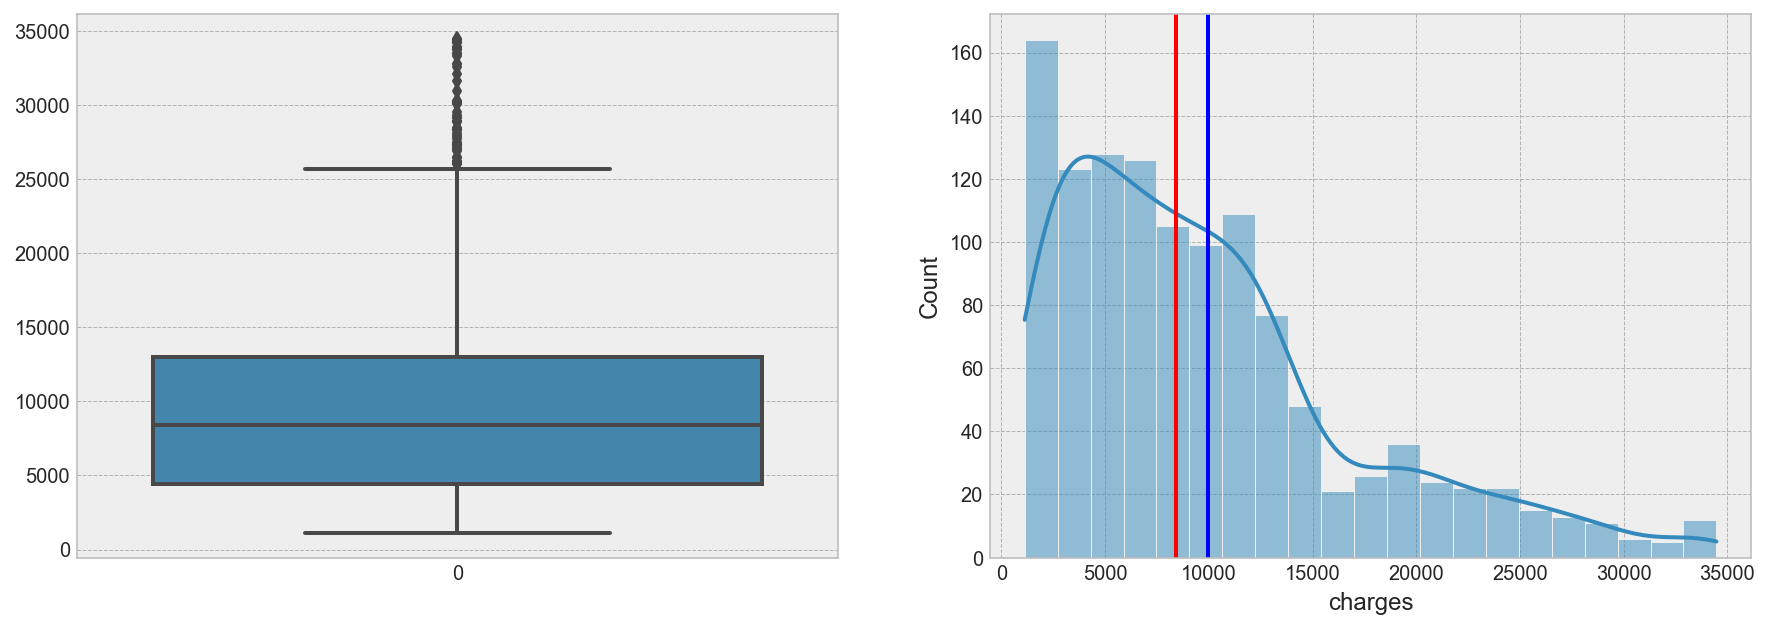

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.charges)

plt.subplot(122)
sns.histplot(df1.charges, kde = True)
plt.axvline(df1.charges.mean(), color = 'blue')
plt.axvline(df1.charges.median(), color = 'red');

In [20]:
num=df1.select_dtypes(include='number')
num
def out(col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=df1[(df1[col]<lb) | (df1[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [21]:
df1.drop(droplist, axis = 0, inplace = True)

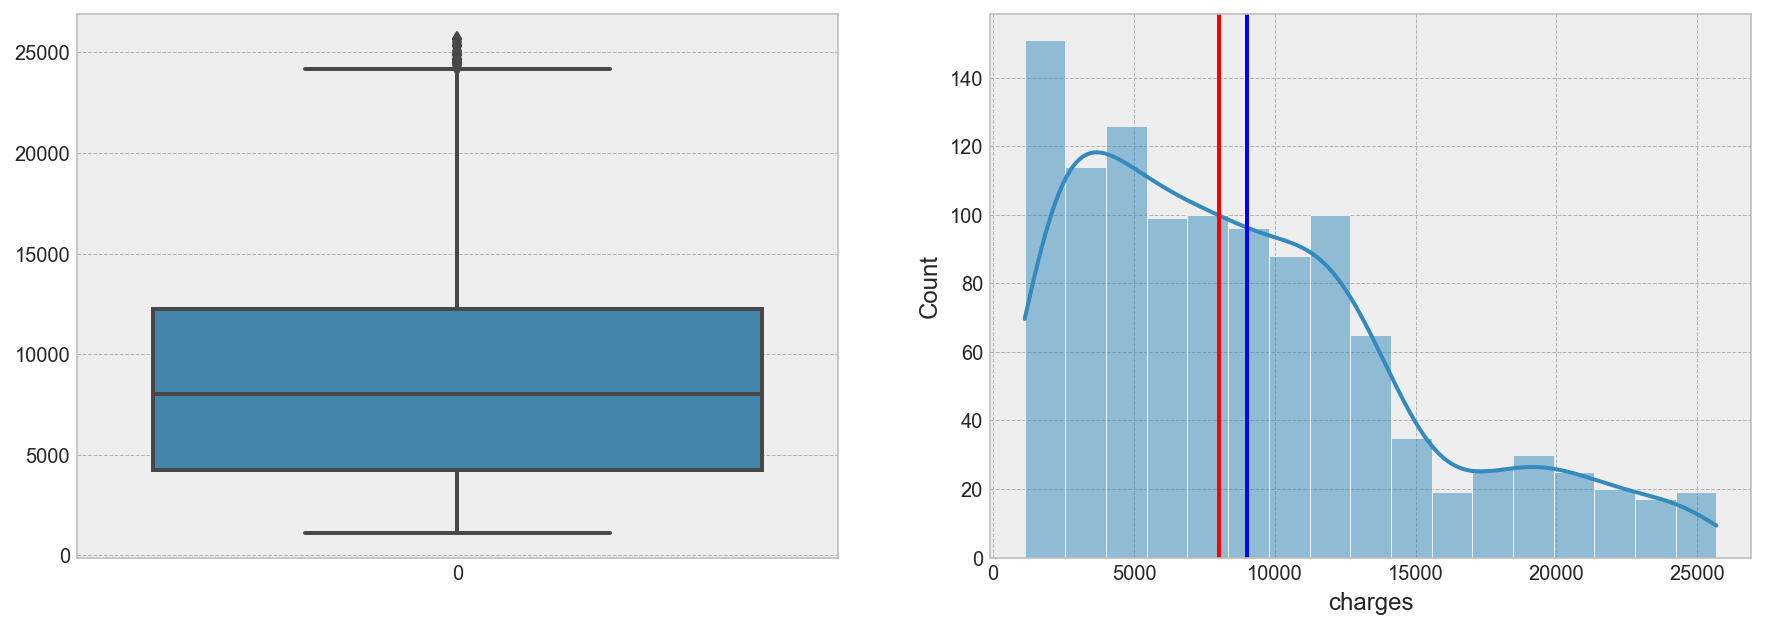

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.charges)

plt.subplot(122)
sns.histplot(df1.charges, kde = True)
plt.axvline(df1.charges.mean(), color = 'blue')
plt.axvline(df1.charges.median(), color = 'red');

In [23]:
num=df1.select_dtypes(include='number')
num
def out(col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=df1[(df1[col]<lb) | (df1[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,52,44.700,3,11411.68500
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350


In [24]:
df1.drop(droplist, axis = 0, inplace = True)

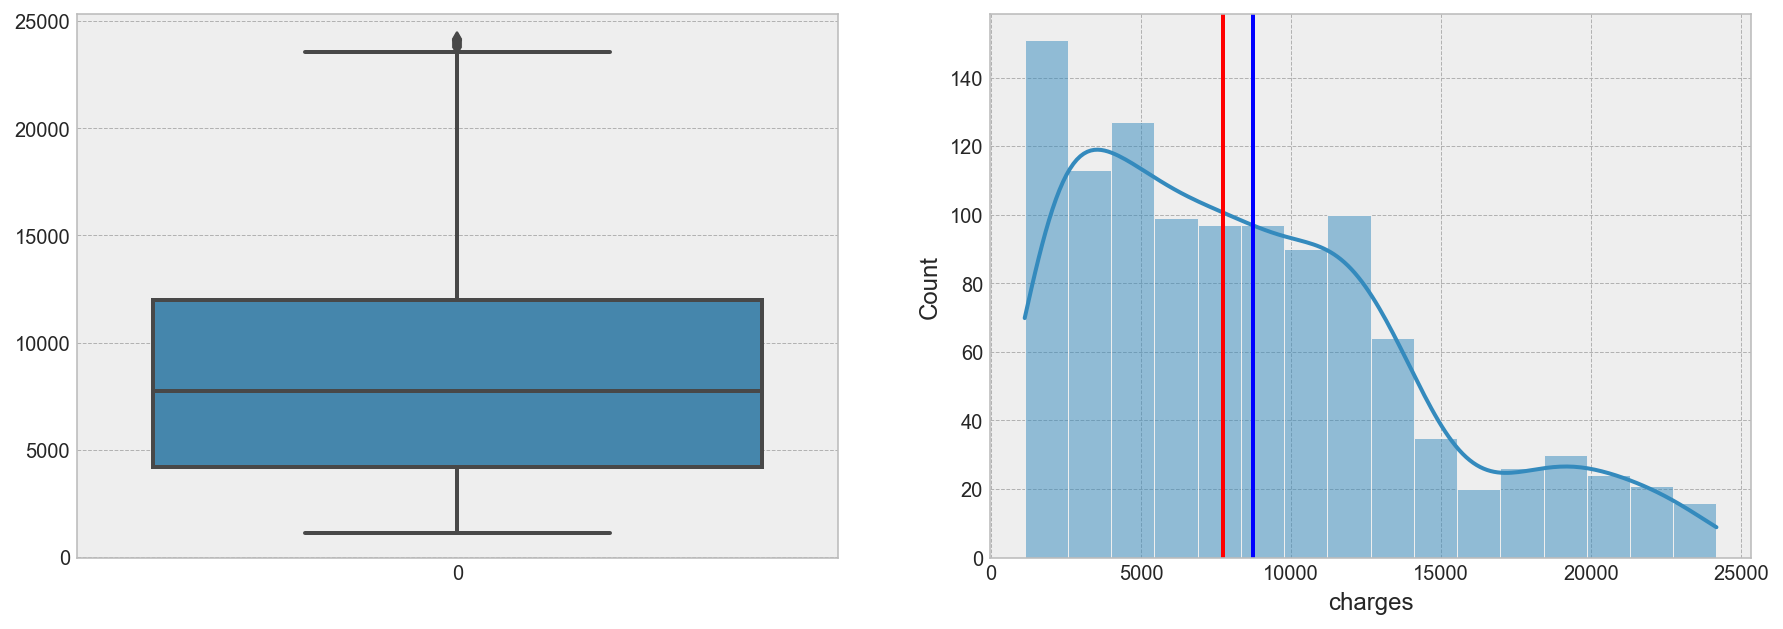

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.charges)

plt.subplot(122)
sns.histplot(df1.charges, kde = True)
plt.axvline(df1.charges.mean(), color = 'blue')
plt.axvline(df1.charges.median(), color = 'red');

In [26]:
num=df1.select_dtypes(include='number')
num
def out(col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=df1[(df1[col]<lb) | (df1[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,52,44.700,3,11411.68500
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350


In [27]:
df1.drop(droplist, axis = 0, inplace = True)

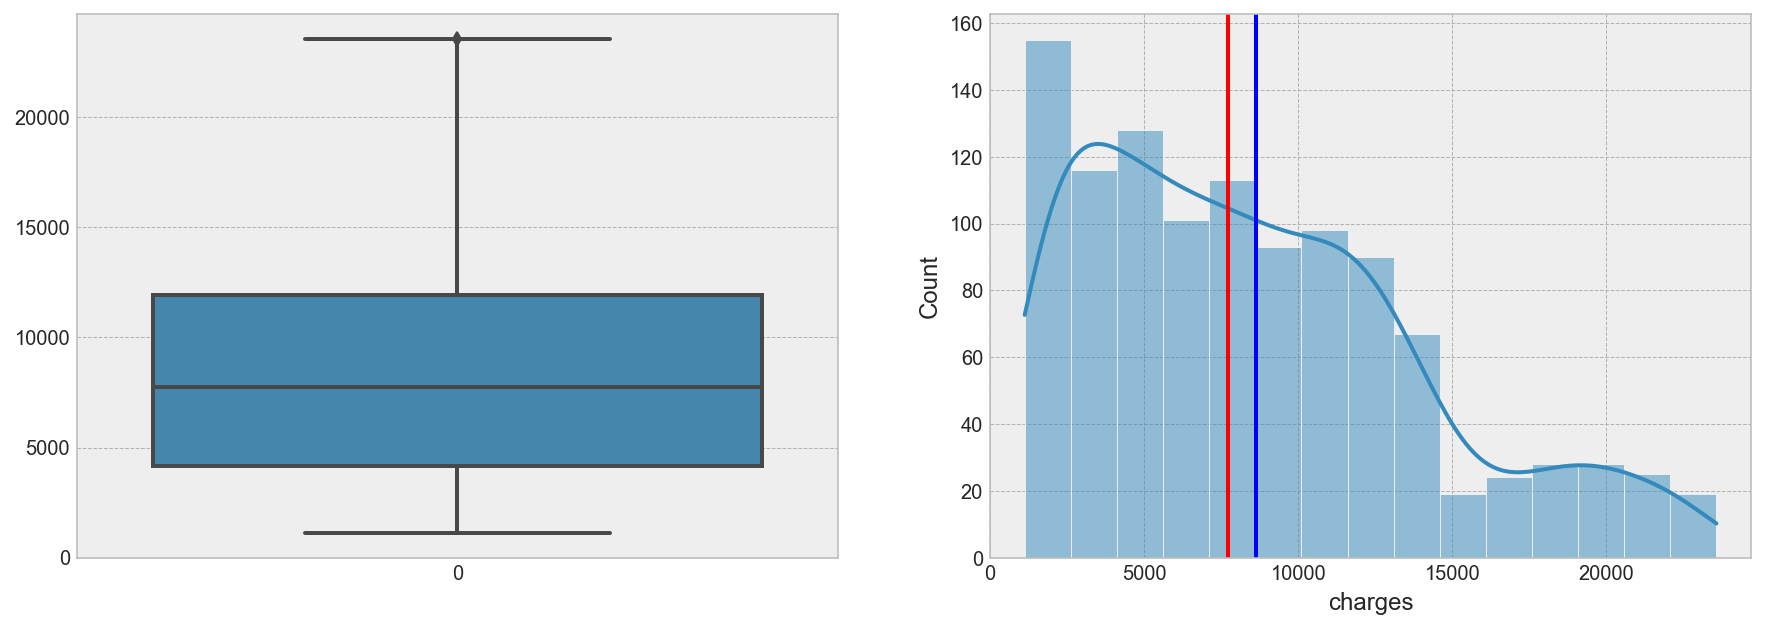

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.charges)

plt.subplot(122)
sns.histplot(df1.charges, kde = True)
plt.axvline(df1.charges.mean(), color = 'blue')
plt.axvline(df1.charges.median(), color = 'red');

In [29]:
num=df1.select_dtypes(include='number')
num
def out(col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=df1[(df1[col]<lb) | (df1[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,52,44.700,3,11411.68500
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350


In [30]:
df1.drop(droplist, axis = 0, inplace = True)

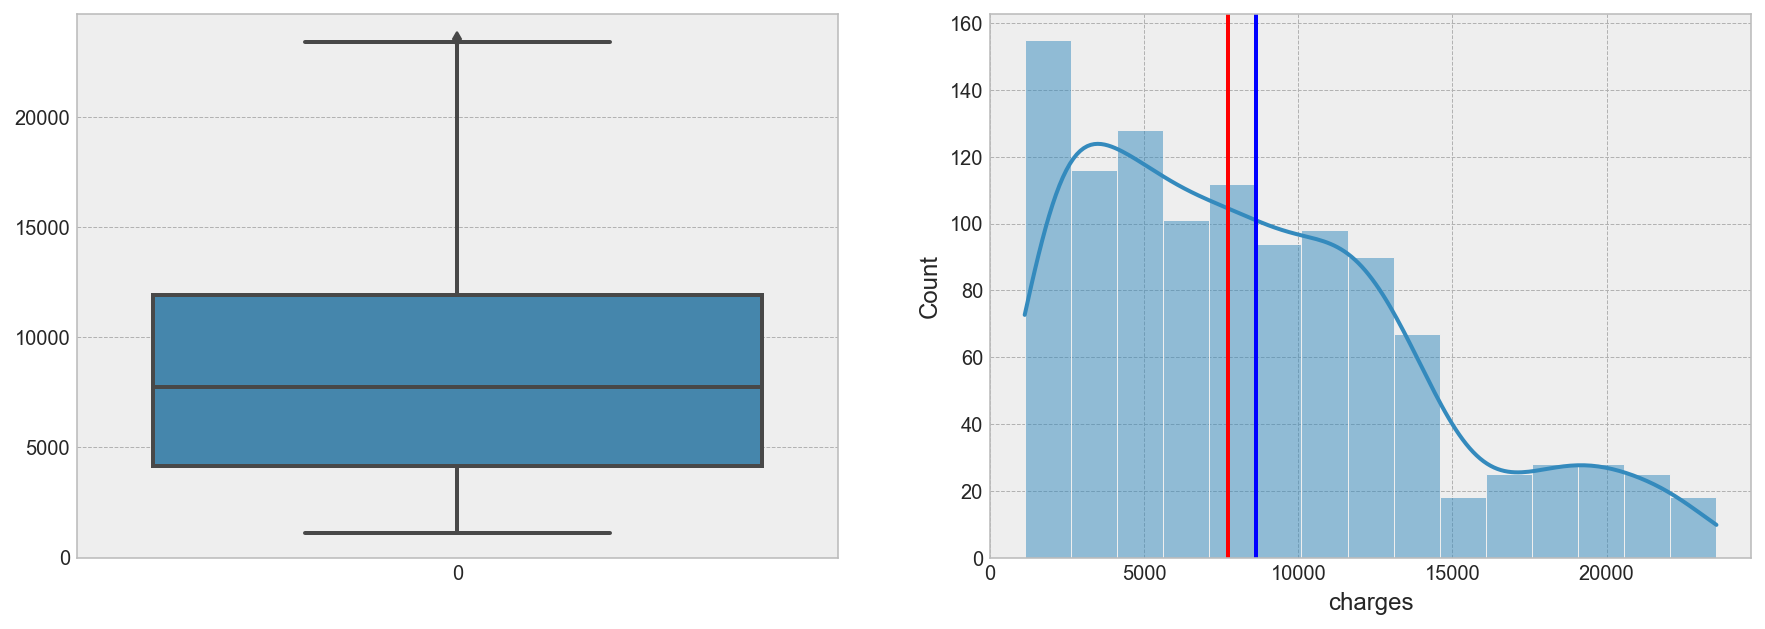

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.charges)

plt.subplot(122)
sns.histplot(df1.charges, kde = True)
plt.axvline(df1.charges.mean(), color = 'blue')
plt.axvline(df1.charges.median(), color = 'red');

In [32]:
num=df1.select_dtypes(include='number')
num
def out(col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=df1[(df1[col]<lb) | (df1[col]>ub)].index
    return outliers
droplist=[]
for i in num:
    droplist.extend(out(i))

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,52,44.700,3,11411.68500
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350


In [33]:
df1.drop(droplist, axis = 0, inplace = True)

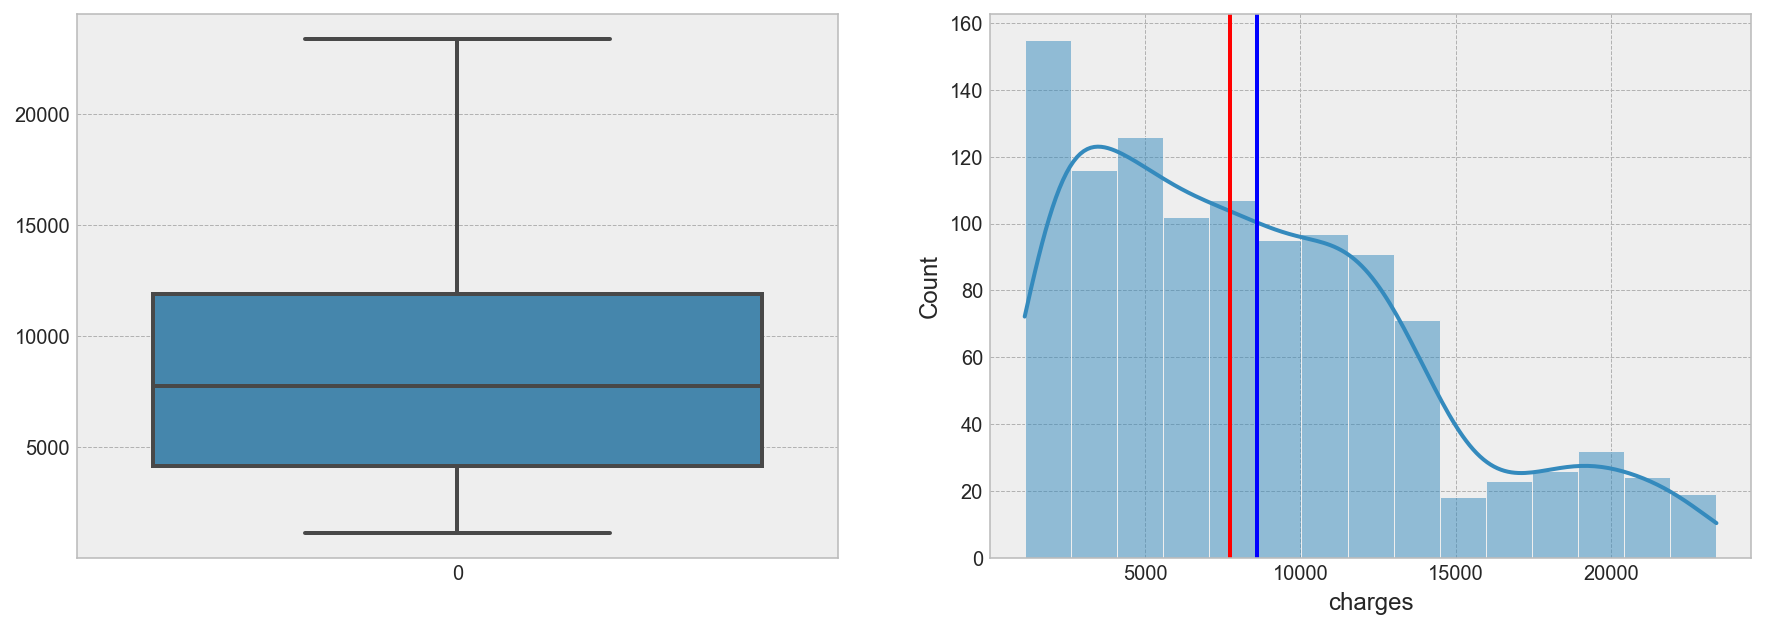

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.charges)

plt.subplot(122)
sns.histplot(df1.charges, kde = True)
plt.axvline(df1.charges.mean(), color = 'blue')
plt.axvline(df1.charges.median(), color = 'red');

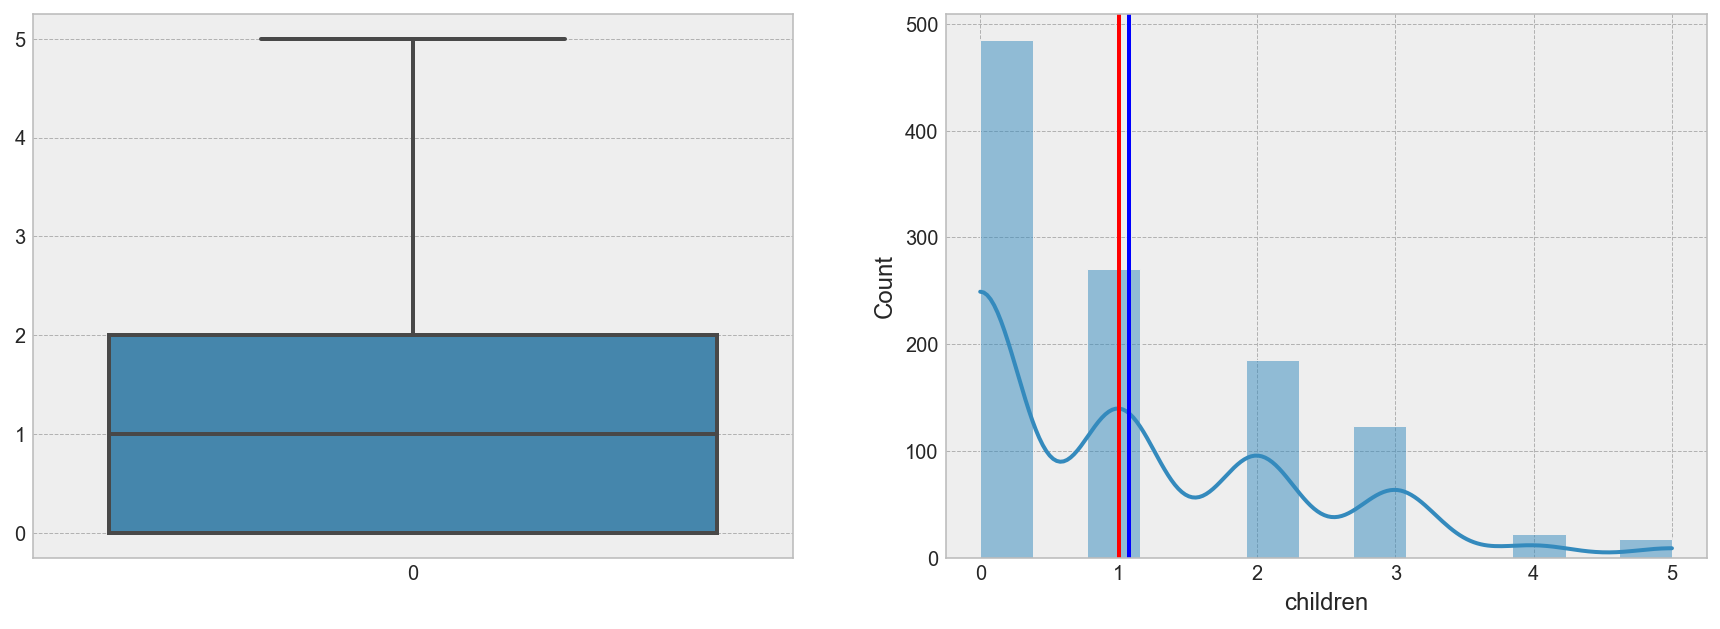

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.children)

plt.subplot(122)
sns.histplot(df1.children, kde = True)
plt.axvline(df1.children.mean(), color = 'blue')
plt.axvline(df1.children.median(), color = 'red');

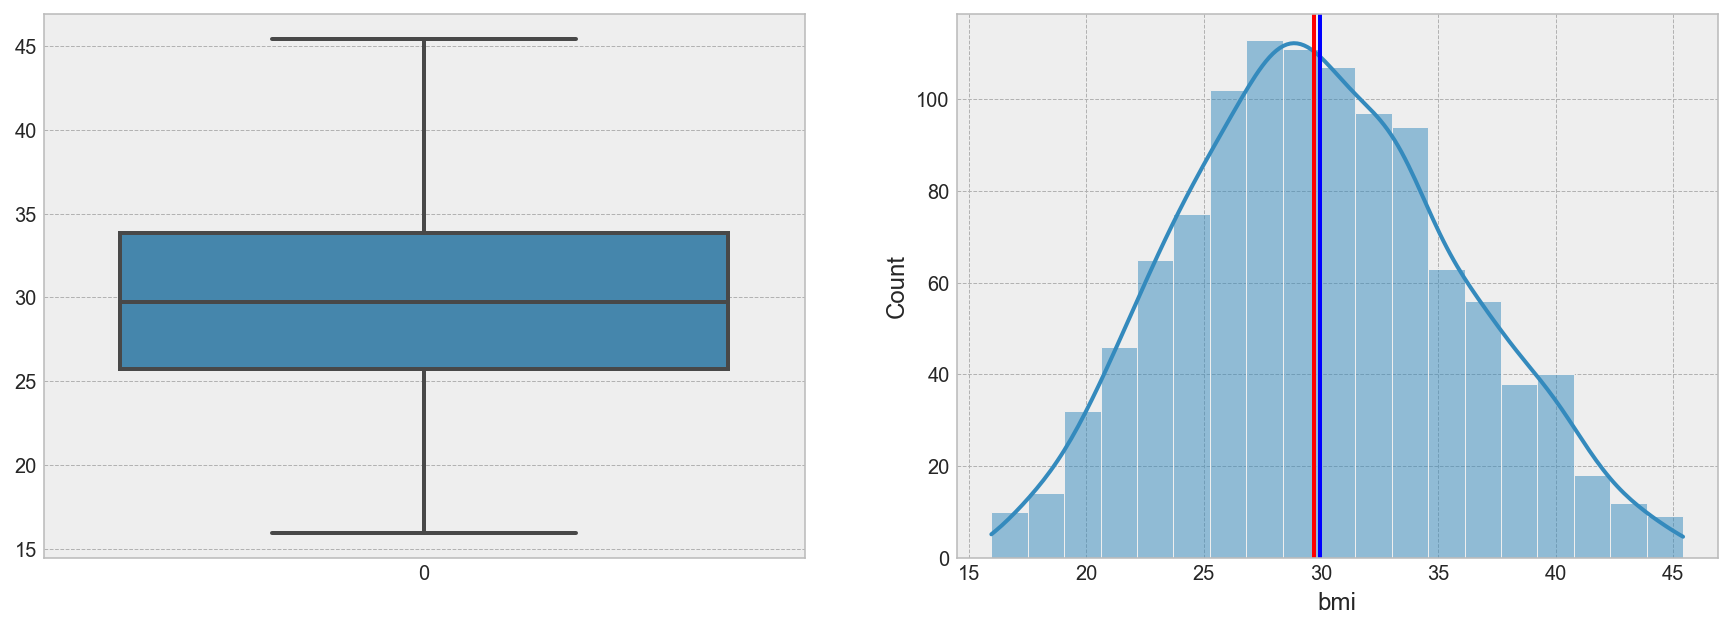

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df1.bmi)

plt.subplot(122)
sns.histplot(df1.bmi, kde = True)
plt.axvline(df1.bmi.mean(), color = 'blue')
plt.axvline(df1.bmi.median(), color = 'red');

### Analysis

In [37]:
df1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


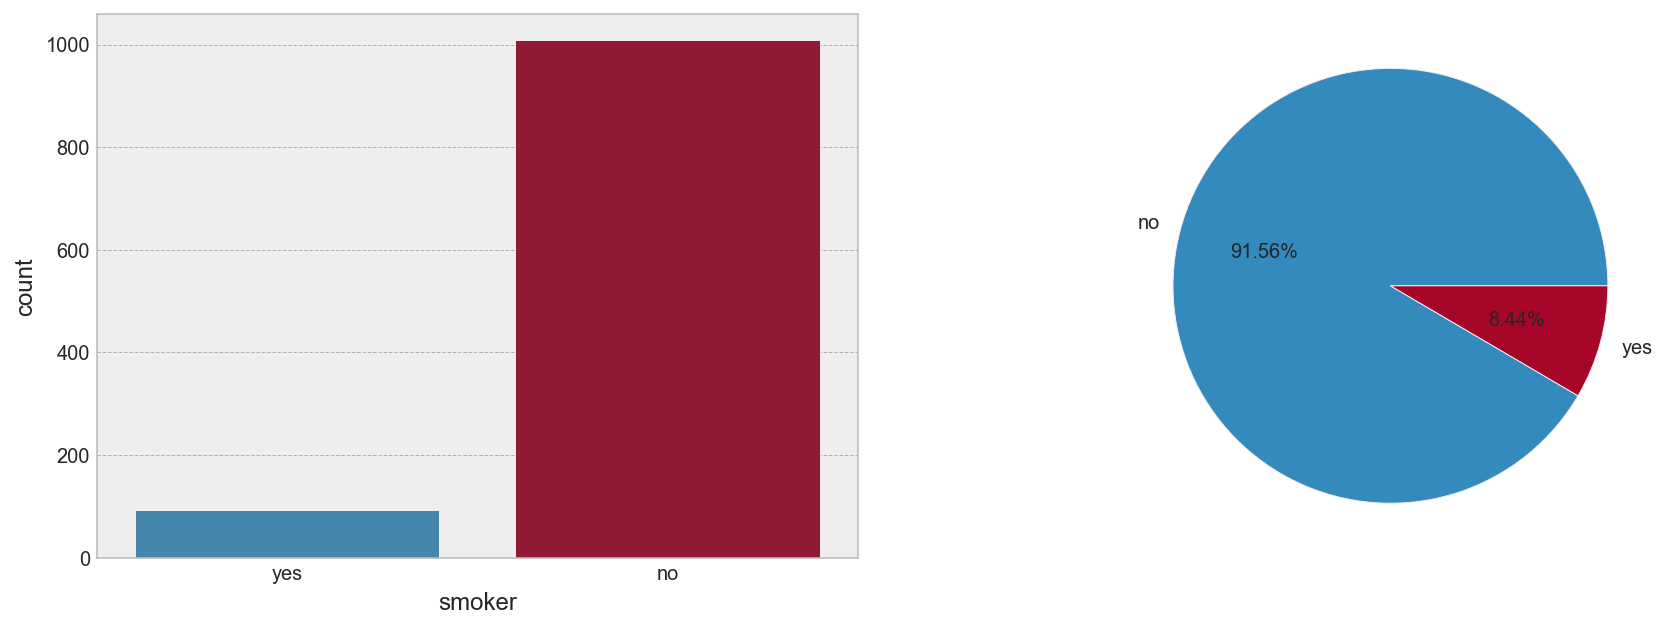

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df1.smoker)
plt.subplot(122)
plt.pie(df1.smoker.value_counts().values,labels=df1.smoker.value_counts().index,autopct='%.2f%%');

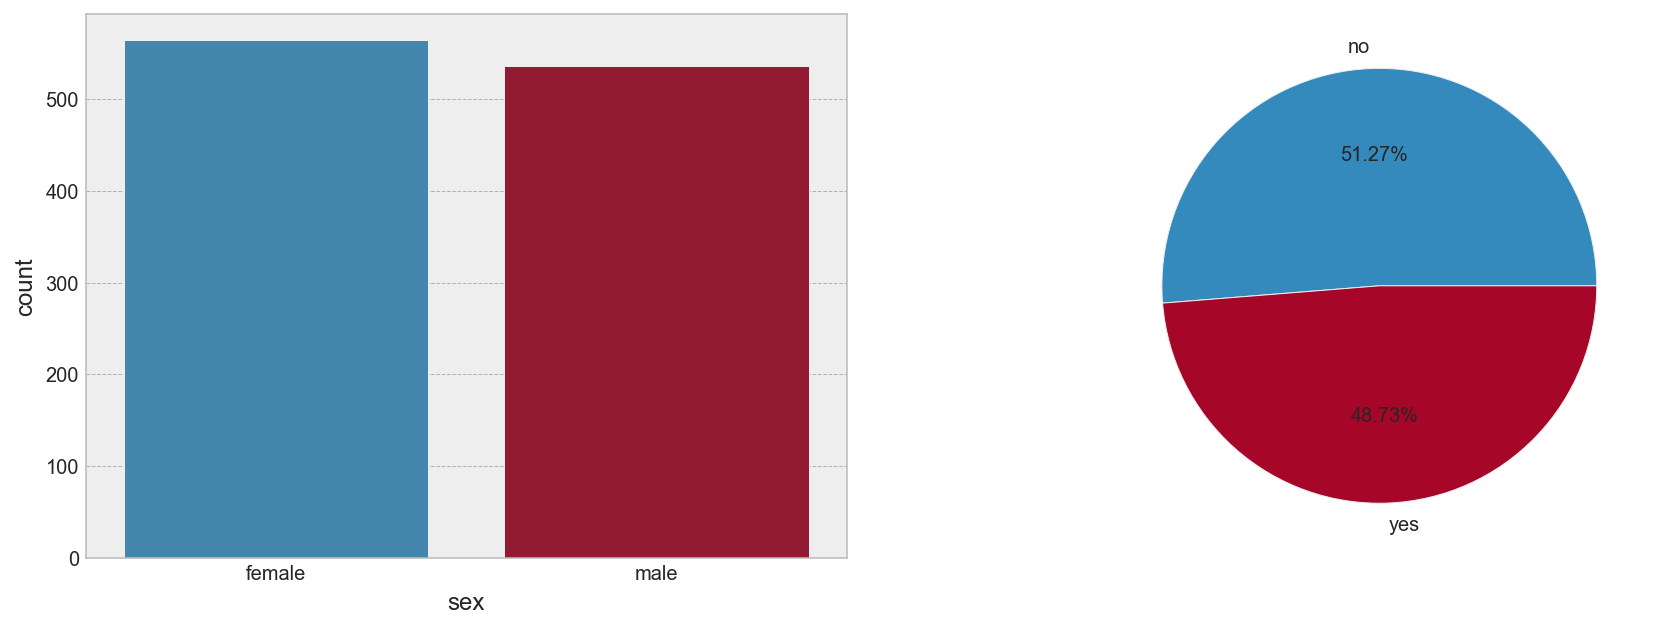

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df1.sex)
plt.subplot(122)
plt.pie(df1.sex.value_counts().values,labels=df1.smoker.value_counts().index,autopct='%.2f%%');

<AxesSubplot:xlabel='age', ylabel='charges'>

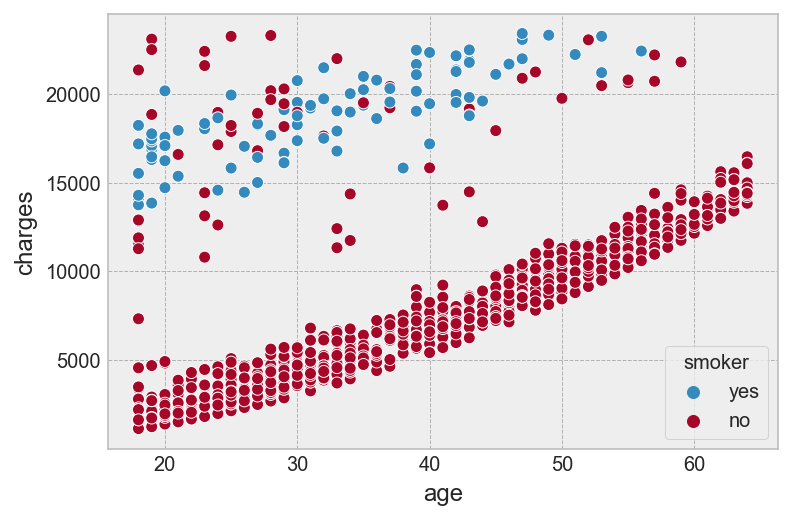

In [40]:
sns.scatterplot(x=df1.age,y=df1.charges,hue=df1.smoker)

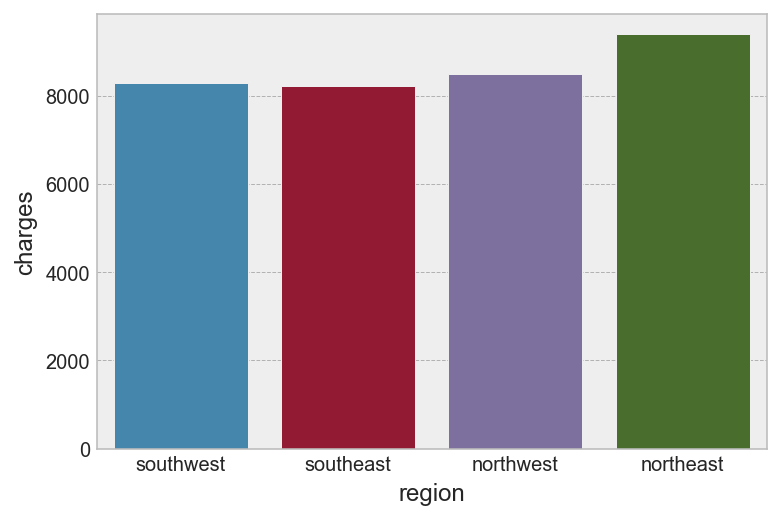

In [41]:
sns.barplot(x=df1.region,y=df1.charges,ci=False);

<AxesSubplot:>

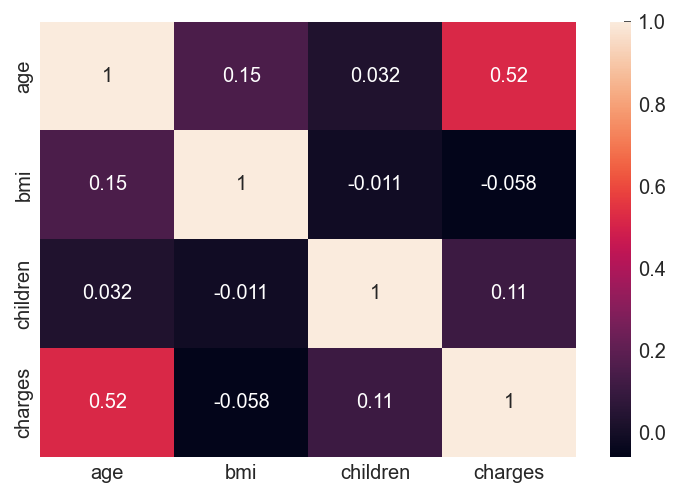

In [42]:
sns.heatmap(df1.corr(),annot=True)

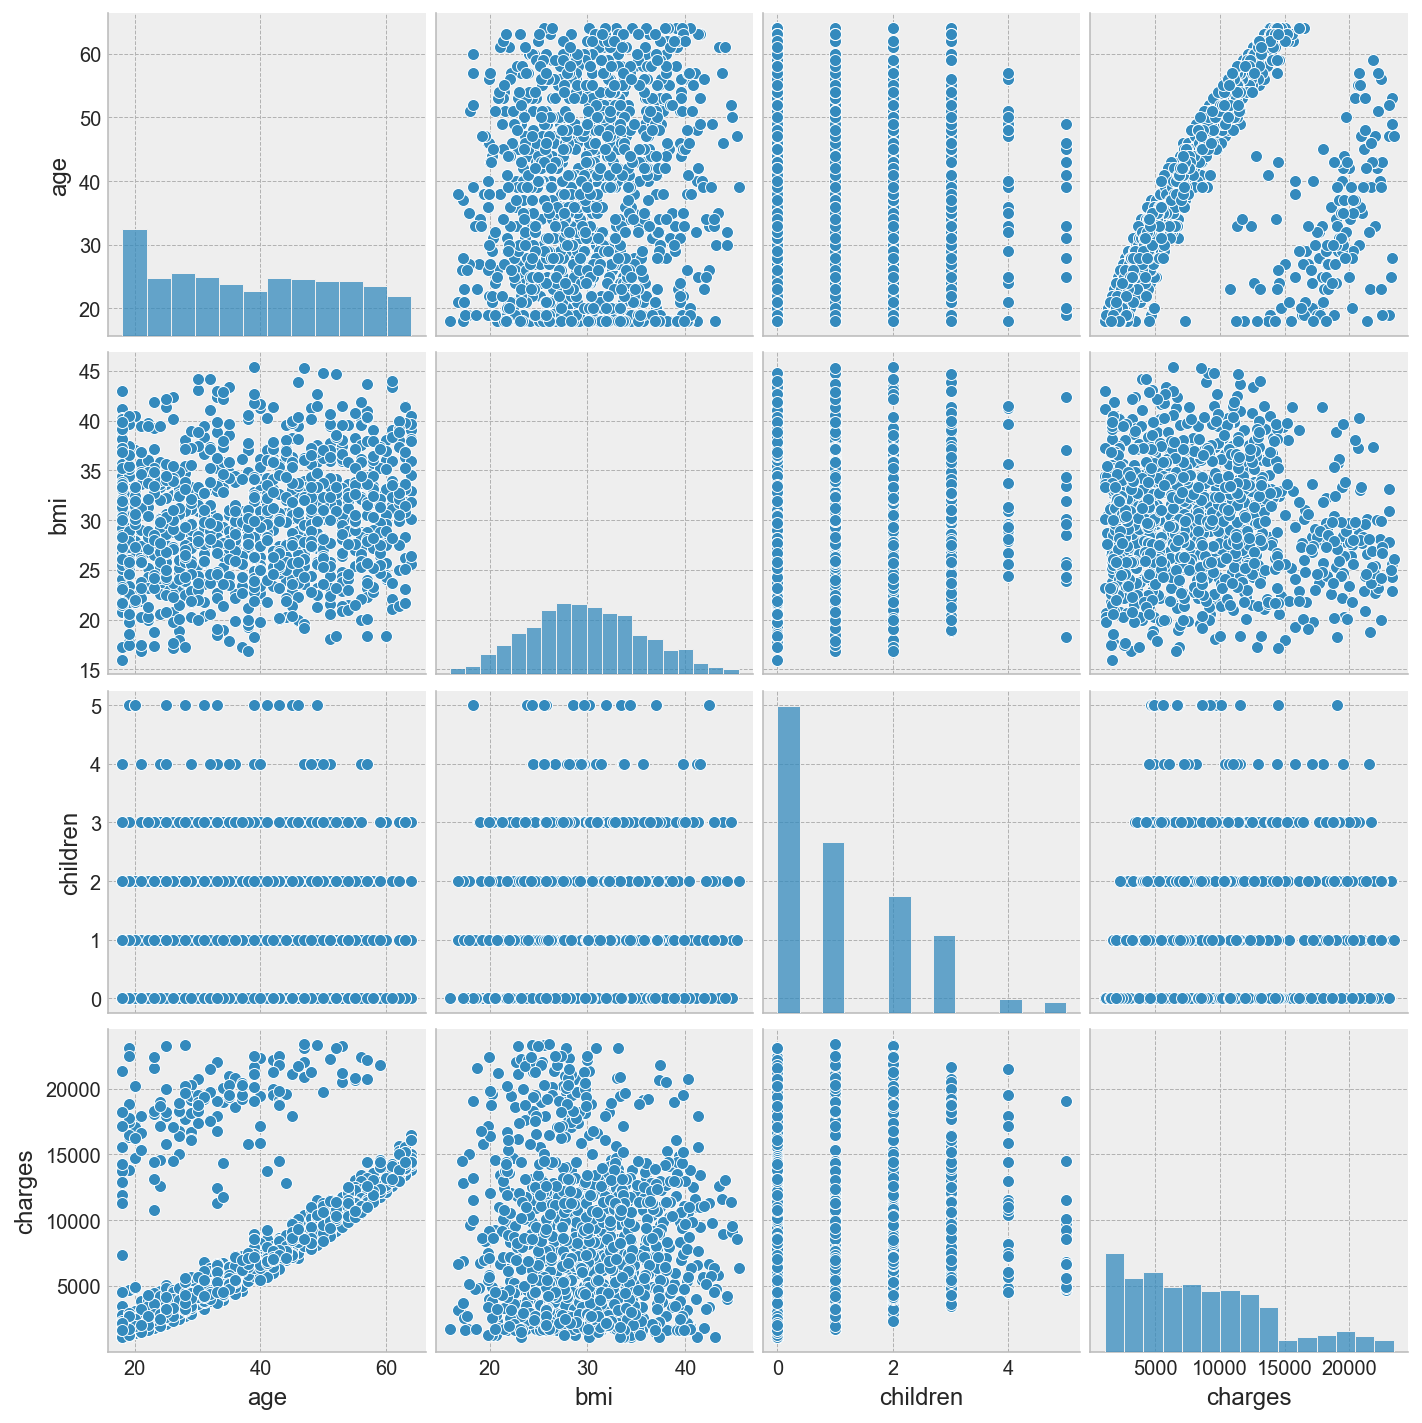

In [43]:
sns.pairplot(df1);

In [44]:
df1.to_csv(r"C:\Users\psath\Downloads\Machine Learning(Insurance)\insurance_cleaned.csv", index = False)

In [45]:
medical_df1 = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Insurance)\insurance_cleaned.csv", skipinitialspace = True)

In [46]:
medical_df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1097,52,female,44.700,3,no,southwest,11411.68500
1098,50,male,30.970,3,no,northwest,10600.54830
1099,18,female,31.920,0,no,northeast,2205.98080
1100,18,female,36.850,0,no,southeast,1629.83350


## Machine Learning Problem
* Build a system which can take features of Insurance like age, sex, bmi, children, smoker, region, etc.. and predicts the charges of Medical Insurance.

Target Variable: Charges

## Identfing the Input and the Output Variables

In [47]:
y = medical_df1['charges']
x = medical_df1[['age','sex','bmi','children','smoker','region']]

In [48]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [49]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Sepearting the Data into Train and Test

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(826, 6) (826,)
(276, 6) (276,)


In [51]:
x_train

,age,sex,bmi,children,smoker,region
1062,36,female,25.900,1,no,southwest
1100,18,female,36.850,0,no,southeast
861,43,female,25.080,0,no,northeast
545,49,male,28.700,1,no,southwest
689,58,male,34.390,0,no,northwest
...,...,...,...,...,...,...
1033,40,female,29.300,4,no,southwest
763,43,male,23.200,0,no,southwest
835,48,male,32.300,1,no,northwest
559,53,male,26.410,2,no,northeast


In [52]:
x_test

,age,sex,bmi,children,smoker,region
568,56,male,33.725,0,no,northwest
615,21,male,28.975,0,no,northwest
478,32,female,23.650,1,no,southeast
484,58,female,29.000,0,no,southwest
940,52,male,32.775,3,no,northwest
...,...,...,...,...,...,...
713,18,male,37.290,0,no,southeast
443,46,female,28.050,1,no,southeast
711,51,male,25.400,0,no,southwest
54,27,female,24.750,0,yes,southeast


In [53]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(826, 6) (826,)
(276, 6) (276,)


## Separating Categorical and Numerical Columns

In [54]:
x_train.head()

,age,sex,bmi,children,smoker,region
1062,36,female,25.90,1,no,southwest
1100,18,female,36.85,0,no,southeast
861,43,female,25.08,0,no,northeast
545,49,male,28.70,1,no,southwest
689,58,male,34.39,0,no,northwest


In [55]:
x_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [56]:
x_train_cat = x_train.select_dtypes(include=['object'])

x_train_cat.head()

,sex,smoker,region
1062,female,no,southwest
1100,female,no,southeast
861,female,no,northeast
545,male,no,southwest
689,male,no,northwest


In [57]:
x_train_num = x_train.select_dtypes(include=['int64', 'float64'])

x_train_num.head()

,age,bmi,children
1062,36,25.90,1
1100,18,36.85,0
861,43,25.08,0
545,49,28.70,1
689,58,34.39,0


## Scaling the Numerical Features

In [58]:
x_train_num.head()

,age,bmi,children
1062,36,25.90,1
1100,18,36.85,0
861,43,25.08,0
545,49,28.70,1
689,58,34.39,0


In [59]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_num_transformed = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)

x_train_num_transformed.head()

,age,bmi,children
1062,-0.180992,-0.694242,-0.059535
1100,-1.475986,1.161355,-0.879133
861,0.322616,-0.833200,-0.879133
545,0.754280,-0.219751,-0.059535
689,1.401777,0.744481,-0.879133


In [60]:
x_train_num_transformed.describe()

,age,bmi,children
count,8.260000e+02,8.260000e+02,8.260000e+02
mean,-1.935498e-17,-6.279615e-16,-1.118288e-16
std,1.000606e+00,1.000606e+00,1.000606e+00
min,-1.475986e+00,-2.378684e+00,-8.791327e-01
25%,-9.004331e-01,-7.094936e-01,-8.791327e-01
50%,-3.710432e-02,-5.029051e-02,-5.953494e-02
75%,8.262244e-01,6.953376e-01,7.600628e-01
max,1.833441e+00,2.615330e+00,3.218856e+00


In [61]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [38.5157385  29.99676755  1.07263923]
Std of each column: [13.89968799  5.90106468  1.22011076]


## Applying OneHotEncoding on Categorical Columns

In [62]:
x_train_cat['sex'].value_counts(normalize=True)

female    0.512107
male      0.487893
Name: sex, dtype: float64

In [63]:
x_train_cat['smoker'].value_counts(normalize=True)

no     0.917676
yes    0.082324
Name: smoker, dtype: float64

In [64]:
x_train_cat['region'].value_counts(normalize=True)

northwest    0.261501
southwest    0.260291
southeast    0.246973
northeast    0.231235
Name: region, dtype: float64

In [65]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_cat_ohe = pd.DataFrame(encoder.fit_transform(x_train_cat), 
                               columns=encoder.get_feature_names_out(x_train_cat.columns), 
                               index = x_train_cat.index)

x_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1062,0.0,0.0,0.0,0.0,1.0
1100,0.0,0.0,0.0,1.0,0.0
861,0.0,0.0,0.0,0.0,0.0
545,1.0,0.0,0.0,0.0,1.0
689,1.0,0.0,1.0,0.0,0.0


## Concatinating the Encoded Categorical Features and Transformed Numerical Features

In [66]:
x_train_transformed = pd.concat([x_train_num_transformed, x_train_cat_ohe], axis=1)

x_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1062,-0.180992,-0.694242,-0.059535,0.0,0.0,0.0,0.0,1.0
1100,-1.475986,1.161355,-0.879133,0.0,0.0,0.0,1.0,0.0
861,0.322616,-0.833200,-0.879133,0.0,0.0,0.0,0.0,0.0
545,0.754280,-0.219751,-0.059535,1.0,0.0,0.0,0.0,1.0
689,1.401777,0.744481,-0.879133,1.0,0.0,1.0,0.0,0.0


## Preparing Test Data

In [67]:
x_test.head()

,age,sex,bmi,children,smoker,region
568,56,male,33.725,0,no,northwest
615,21,male,28.975,0,no,northwest
478,32,female,23.650,1,no,southeast
484,58,female,29.000,0,no,southwest
940,52,male,32.775,3,no,northwest


In [68]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 568 to 416
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       276 non-null    int64  
 1   sex       276 non-null    object 
 2   bmi       276 non-null    float64
 3   children  276 non-null    int64  
 4   smoker    276 non-null    object 
 5   region    276 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 15.1+ KB


In [69]:
x_test_cat = x_test.select_dtypes(include=['object'])

x_test_cat.head()

,sex,smoker,region
568,male,no,northwest
615,male,no,northwest
478,female,no,southeast
484,female,no,southwest
940,male,no,northwest


In [70]:
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])

x_test_num.head()

,age,bmi,children
568,56,33.725,0
615,21,28.975,0
478,32,23.650,1
484,58,29.000,0
940,52,32.775,3


In [71]:
x_test_num_transformed = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = x_test_num.columns, 
                                   index = x_test_num.index)

x_test_num_transformed.head()

,age,bmi,children
568,1.257889,0.631790,-0.879133
615,-1.260153,-0.173150,-0.879133
478,-0.468769,-1.075529,-0.059535
484,1.401777,-0.168913,-0.879133
940,0.970113,0.470802,1.579660


In [72]:
x_test_cat_ohe = pd.DataFrame(index = x_test_cat.index)

x_test_cat_ohe.head()

""
568
615
478
484
940


In [73]:
x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat), 
                               columns=encoder.get_feature_names_out(x_test_cat.columns), 
                               index = x_test_cat.index)

x_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
568,1.0,0.0,1.0,0.0,0.0
615,1.0,0.0,1.0,0.0,0.0
478,0.0,0.0,0.0,1.0,0.0
484,0.0,0.0,0.0,0.0,1.0
940,1.0,0.0,1.0,0.0,0.0


In [74]:
x_test_transformed = pd.concat([x_test_num_transformed, x_test_cat_ohe], axis=1)

x_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
568,1.257889,0.631790,-0.879133,1.0,0.0,1.0,0.0,0.0
615,-1.260153,-0.173150,-0.879133,1.0,0.0,1.0,0.0,0.0
478,-0.468769,-1.075529,-0.059535,0.0,0.0,0.0,1.0,0.0
484,1.401777,-0.168913,-0.879133,0.0,0.0,0.0,0.0,1.0
940,0.970113,0.470802,1.579660,1.0,0.0,1.0,0.0,0.0


## Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_transformed, y_train)

LinearRegression()

In [76]:
y_test_pred = regressor.predict(x_test_transformed)

In [77]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
568,10976.24575,11357.710261
615,1906.35825,2926.623266
478,17626.23951,5768.381750
484,11842.44200,11654.977234
940,11289.10925,11447.049454


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

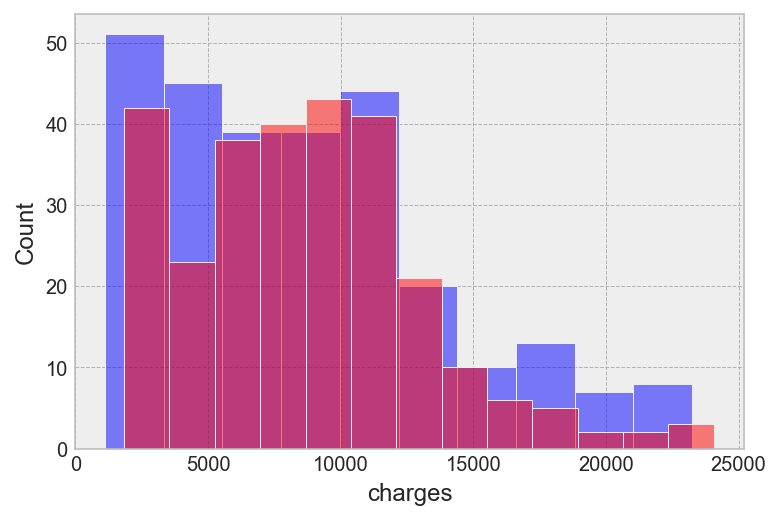

In [78]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [79]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1469.8781176878078
Mean Squared Error:  8236545.657153178
Root Mean Squared Error:  2869.938267132793


## KNN Regression

In [80]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_transformed, y_train)

KNeighborsRegressor()

In [81]:
y_test_pred = regressor.predict(x_test_transformed)

In [82]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
568,10976.24575,10342.32557
615,1906.35825,1895.50507
478,17626.23951,4415.16842
484,11842.44200,12088.48000
940,11289.10925,10077.74056


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

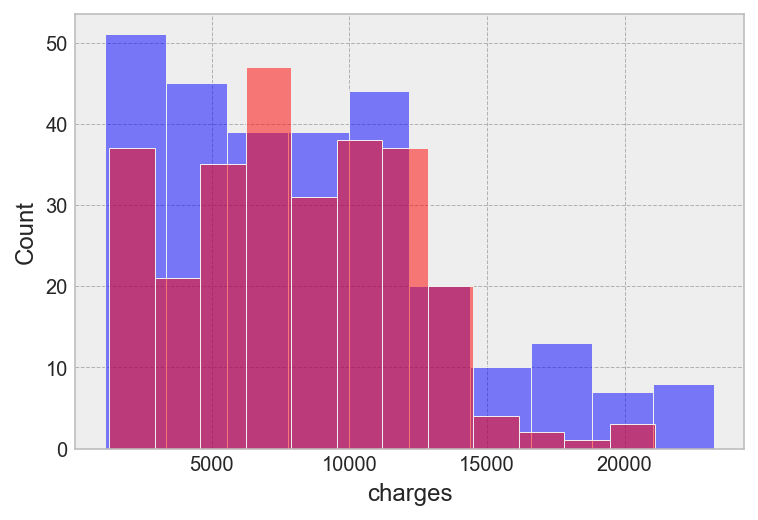

In [83]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [84]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2113.8644146884058
Mean Squared Error:  13329184.94030945
Root Mean Squared Error:  3650.9156304014273


## Decision Tree Regression

In [85]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_transformed, y_train)

DecisionTreeRegressor()

In [86]:
y_test_pred = regressor.predict(x_test_transformed)

In [87]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
568,10976.24575,10594.22570
615,1906.35825,1769.53165
478,17626.23951,4719.52405
484,11842.44200,11455.28000
940,11289.10925,11488.31695


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

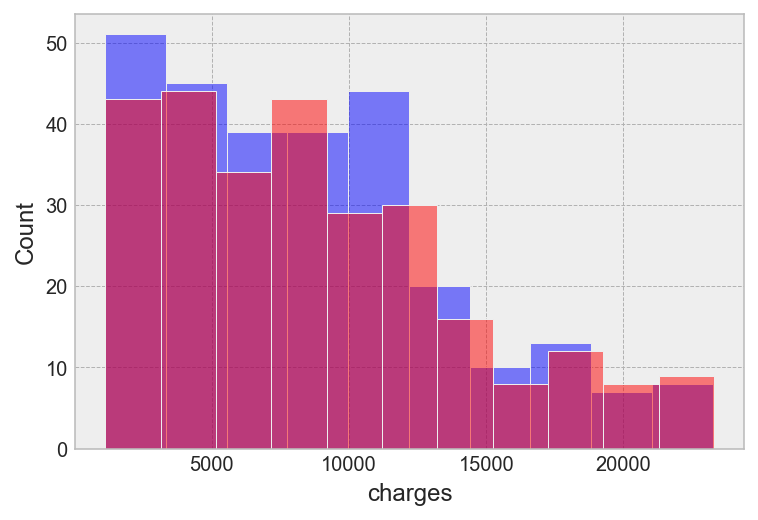

In [88]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [89]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1809.877809311594
Mean Squared Error:  21600123.80962932
Root Mean Squared Error:  4647.5933352251595


## Random Forest Regression

In [90]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_transformed, y_train)

RandomForestRegressor()

In [91]:
y_test_pred = regressor.predict(x_test_transformed)

In [92]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
568,10976.24575,11054.847816
615,1906.35825,2274.111989
478,17626.23951,4917.164079
484,11842.44200,11878.856646
940,11289.10925,11403.607001


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

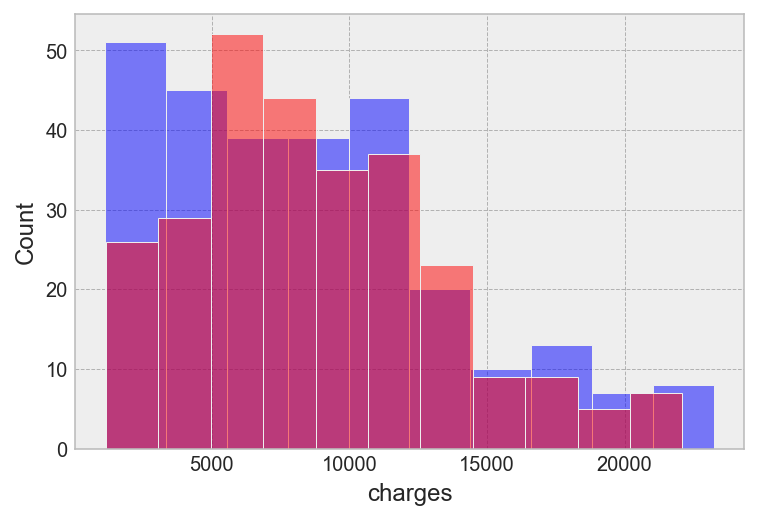

In [93]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [94]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1456.0902391663956
Mean Squared Error:  10258436.406998528
Root Mean Squared Error:  3202.8793931396367


## Support Vector Regressor

In [95]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train_transformed, y_train)

SVR()

In [96]:
y_test_pred = regressor.predict(x_test_transformed)

In [97]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
568,10976.24575,7701.551449
615,1906.35825,7544.847501
478,17626.23951,7588.288980
484,11842.44200,7707.300223
940,11289.10925,7670.860615


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

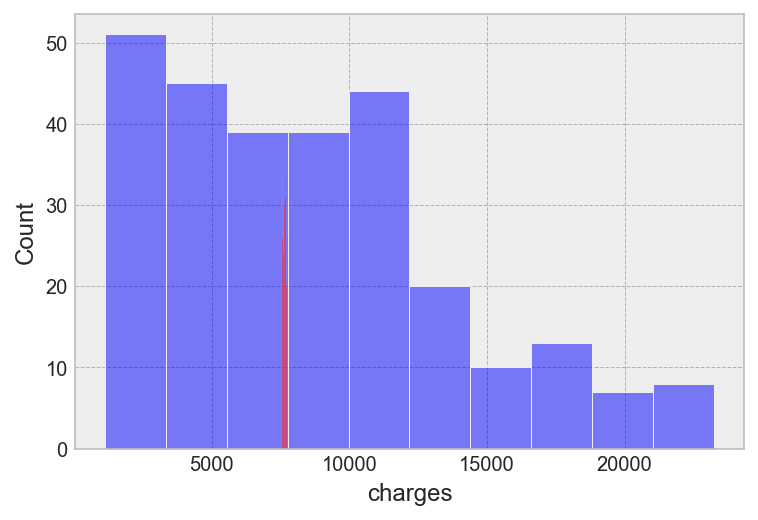

In [98]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [99]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4264.997767227787
Mean Squared Error:  28975502.435839817
Root Mean Squared Error:  5382.889784849753


## Gradient Boosting Regressor

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train_transformed, y_train)

GradientBoostingRegressor()

In [101]:
y_test_pred = regressor.predict(x_test_transformed)

In [102]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
568,10976.24575,11559.408157
615,1906.35825,2590.393460
478,17626.23951,5550.081514
484,11842.44200,12307.081276
940,11289.10925,11665.265817


<AxesSubplot:xlabel='charges', ylabel='Count'>

<AxesSubplot:xlabel='charges', ylabel='Count'>

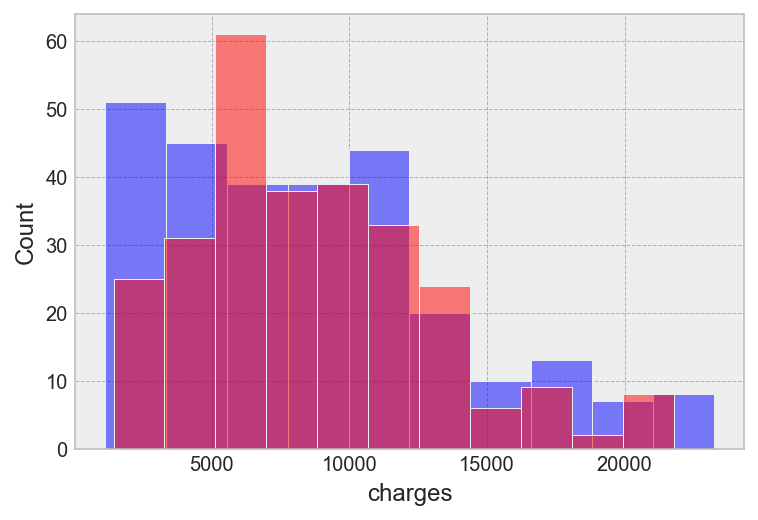

In [103]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [104]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1401.340464372766
Mean Squared Error:  8510022.211199705
Root Mean Squared Error:  2917.1942361110796


## Observation
From Above Observaqtions it is clear that Gradient Boost is best suited algorithm for this task

 Algorithm-------------------Mean Absolute Error\
 LinearRegression------------1469.8781176878078\
 KNN Regressor---------------2113.8644146884058\
 Decision Tree Regression----1829.969220362319\
 Random Forest Regression----1456.849841472815\
 Support Vector Regressor----4264.997767227787\
 Gradient Boosting Regressor- 1401.340464372766